Karar Ağacı Regresyonu ile Ev Fiyat Tahmini

Proje Özeti

Bu proje, karar ağacı regresyonu (Decision Tree Regression) kullanarak ev fiyatlarını tahmin etmeyi amaçlamaktadır.  
Kullanılan veri seti olan *Home Value Insights*, her biri farklı özelliklere sahip 1.000 evi içermektedir.  
Amaç, emlak danışmanlarına veya bireylere satış öncesinde adil, veriye dayalı bir fiyat tahmini sunmaktır.

---

Problem Tanımı

Emlak sektöründe doğru satış fiyatını belirlemek her zaman kolay değildir.  
Fiyat çok yüksek olursa ev uzun süre satılamaz, çok düşük olursa ise zarar edilir.  
Bu proje, geçmiş verileri kullanarak **evin özelliklerine göre en uygun satış fiyatını tahmin eden** bir model geliştirmeyi hedeflemektedir.

---

Veri Seti Özeti

Değişkenler:

- `Square_Footage` – Evin metrekare cinsinden büyüklüğü
- `Num_Bedrooms` – Yatak odası sayısı  
- `Num_Bathrooms` – Banyo sayısı  
- `Year_Built` – Evin yapım yılı  
- `Lot_Size` – Arsasının büyüklüğü (acre cinsinden)  
- `Garage_Size` – Garaj kapasitesi (araç sayısı)  
- `Neighborhood_Quality` – Mahalle kalitesi (1–10 arası puan)  
- `House_Price` – Hedef değişken (evin satış fiyatı)

---

Kullanılan Teknolojiler

- Pandas, NumPy, Matplotlib, Seaborn
- Scikit-Learn (DecisionTreeRegressor, GridSearchCV, cross_val_score)

---

Proje Adımları

1. Veri Keşfi (EDA) – Verilerin dağılımı, korelasyon analizi, görselleştirmeler  
2. Özellik Mühendisliği – Yeni değişkenler oluşturma (ör. ev yaşı, metrekare başına fiyat)  
3. Modelleme – Karar ağacı regresyon modeli kurulumu  
4. Değerlendirme – R², MAE, RMSE gibi metriklerle model performansının ölçülmesi  
5. Optimizasyon – GridSearchCV ile hiperparametre ayarı, cross-validation uygulaması  
6. Yorumlama – Modelin en önemli değişkenlerinin (feature importance) analiz edilmesi

---

Beklenen Sonuç

İyi optimize edilmiş bir karar ağacı modeli, ev fiyatlarını yüksek doğrulukla tahmin edecek.  
Bu sayede emlak sektörü için veriye dayalı fiyat önerileri üretmek mümkün olacaktır.


In [2]:
#Gerekli kütüphanelerin kurulumunu yapalım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Datasetimizi yükleyelim
df = pd.read_csv('house_price_regression_dataset.csv')

#Veri setimizin ilk 5 satırına bakalım
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
#Datasetimizi inceleyelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
#istatistiksel özetine bakalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


In [ ]:
#Train-Test split işlemini yapalım
from sklearn.model_selection import train_test_split
X = df.drop('House_Price', axis = 1)
y = df['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling işlemi yapalım
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modelimizi oluşturalım
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

#Hiperparametre optimizasyonu için GridSearchCV kullanacağız
from sklearn.model_selection import GridSearchCV

params = {
    
    "criterion": ["squared_error", "friedman_mse"],
    "splitter": ["best", "random"],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "max_features": [None, "sqrt"],
    "ccp_alpha": [0.0001, 0.0005, 0.001, 0.005]
}


grid = GridSearchCV(estimator=model, param_grid=params, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train_scaled, y_train)
print("En iyi parametreler : ", grid.best_params_)
best_model = grid.best_estimator_

#Modeli değerlendirelim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
En iyi parametreler :  {'ccp_alpha': 0.0001, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
MAE: 22783.09857580403
MSE: 838286322.3321908
RMSE: 28953.174650324458
R²: 0.98699501728349


In [ ]:
#Train ve Test R² karşılaştırması
y_pred_train = best_model.predict(X_train_scaled)

print("Train R²:", r2_score(y_train, y_pred_train))
print("Test  R²:", r2_score(y_test, y_pred))


Train R²: 0.9952744786259023
Test  R²: 0.98699501728349


In [ ]:
#Cross-Validation ile modelin genelleme performansını ölçelim
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring="r2")
print("CV R² skorları:", scores)
print("CV ortalama R²:", scores.mean())


CV R² skorları: [0.98121049 0.98514711 0.98571791 0.98310145 0.98505056]
CV ortalama R²: 0.984045503386332


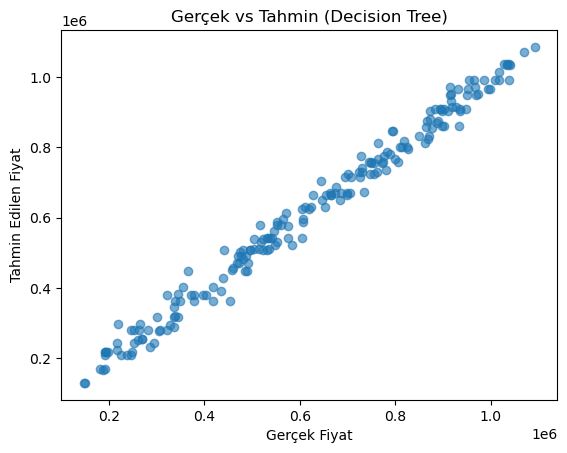

In [ ]:
#Tahmin sonuçlarını görselleştirelim
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin (Decision Tree)")
plt.show()

In [ ]:
#Yeni bir ev için tahmin yapalım

sample_house = pd.DataFrame({
    "Square_Footage": [2500],      
    "Num_Bedrooms": [4],
    "Num_Bathrooms": [2],
    "Year_Built": [2012],
    "Lot_Size": [2.0],             
    "Garage_Size": [2],
    "Neighborhood_Quality": [8]    
})

# Aynı scaler’ı kullanarak ölçekle
sample_scaled = scaler.transform(sample_house)

# Tahmini yap
pred_price = best_model.predict(sample_scaled)[0]

print(f"Tahmini ev fiyatı: ${pred_price:,.2f}")


Tahmini ev fiyatı: $548,063.61


Sonuç

Karar ağacı regresyon modeliyle ev fiyatı tahmini yapılmıştır.  

Model, GridSearchCV ile optimize edilmiş ve yüksek doğrulukta sonuçlar vermiştir.

- Train R²: 0.995  
- Test R²: 0.987  
- CV Ortalama R²: 0.984  
- MAE: 22,783 $  
- RMSE: 28,953 $

Model overfit etmeden genel örüntüleri başarıyla öğrenmiştir. 

Tahminler veri setiyle uyumlu ve ekonomik açıdan gerçekçidir. 

Örneğin, 4+2 özellikli orta-üst segment bir evin tahmini fiyatı ≈ 548,000 $ olarak bulunmuştur.
